In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit

## NOTES ##

To do: <br> Add a colormap using matplotlib to the characteristic curve <br> 

## data sources
* MOF-801 [here](https://www.nature.com/articles/s41467-018-03162-7)

In [2]:
R = 8.314 # J/(mol-K)

In [10]:
def read_ads_data(mof, temperature):
    ads_data = pd.read_csv('data/{}_{}C.csv'.format(mof, temperature))
    
    ads_data['P/P_0'] = ads_data['RH[%]'] / 100
    
    # polanyi adsorption potential
    ads_data["A"] = -R * (temperature+273.15) * np.log(ads_data['P/P_0'])
    
    ads_data = ads_data.drop(columns=['RH[%]'])
    return ads_data

In [11]:
ads_data = read_ads_data("MOF_801", 25)
ads_data

,Water Uptake [kg kg-1],P/P_0,A
0,0.054,0.01,11415.383816
1,0.060,0.02,9697.197345
2,0.068,0.03,8692.122691
3,0.075,0.04,7979.010875
4,0.085,0.05,7425.878378
...,...,...,...
84,0.402,0.85,402.855027
85,0.404,0.86,373.862660
86,0.406,0.87,345.205472
87,0.408,0.88,316.875803


In [ ]:
def viz(ads_data):
    fig = plt.figure()           
    plt.scatter(ads_data['P/P_0'], ads_data['Water Uptake [kg kg-1]'])
    plt.title('MOF-801 adsorption isotherm at 25$^\circ$C')
    plt.xlabel('relative humidity, $P/P_0$')
    plt.ylabel('water uptake [kg/kg]')
    plt.ylim(ymin=0)
    plt.xlim(0, 1)
    return fig

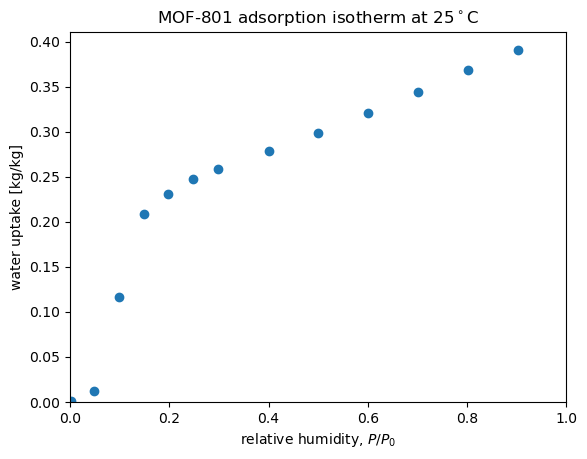

In [ ]:
viz(ads_data)
plt.show()

In [ ]:
n_of_P = interpolate.CubicSpline(ads_data['P/P_0'], ads_data['Water Uptake [kg kg-1]'])

In [ ]:
n_max = n_of_P(1.0)

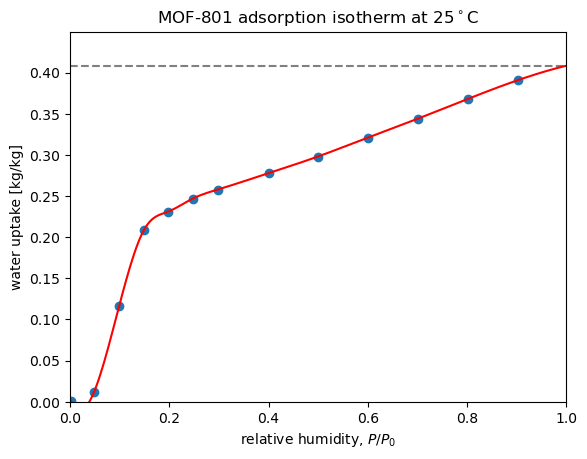

In [ ]:
p = np.linspace(0, 1, 250)

fig = viz(ads_data)
fig.axes[0].axhline(n_max, color="gray", linestyle="--")
fig.axes[0].plot(p, n_of_P(p), c='red')
fig.axes[0].set_ylim(0, n_max * 1.1)

plt.show()

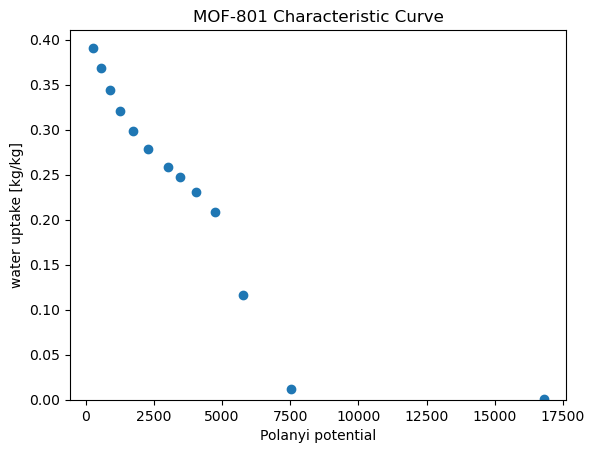

In [ ]:
fig = plt.figure()           
plt.scatter(ads_data['A'], ads_data['Water Uptake [kg kg-1]'])
plt.title('MOF-801 Characteristic Curve')
plt.xlabel('Polanyi potential')
plt.ylabel('water uptake [kg/kg]')
plt.ylim(ymin=0)
# plt.xlim(0, 1)
plt.show()

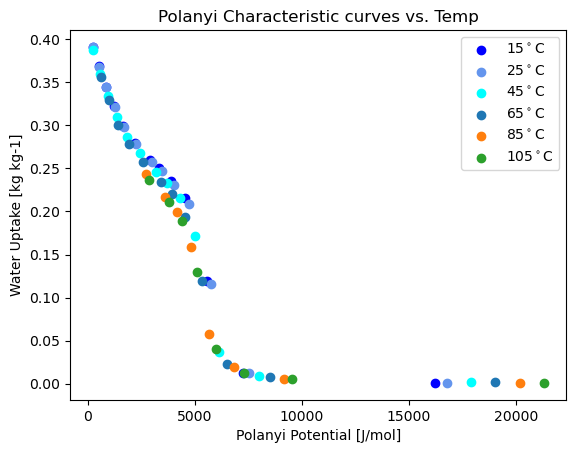

In [ ]:
ads_data_15 = read_ads_data('MOF_801',15)
ads_data_25 = read_ads_data('MOF_801',25)
ads_data_45 = read_ads_data('MOF_801',45)
ads_data_65 = read_ads_data('MOF_801',65)
ads_data_85 = read_ads_data('MOF_801',85)
ads_data_105 = read_ads_data('MOF_801',105)

plt.scatter(ads_data_15['A'],ads_data_15['Water Uptake [kg kg-1]'],c = 'blue', label = '15$^\circ$C')
plt.scatter(ads_data_25['A'],ads_data_25['Water Uptake [kg kg-1]'], c = 'cornflowerblue', label = '25$^\circ$C')
plt.scatter(ads_data_45['A'],ads_data_45['Water Uptake [kg kg-1]'], c = 'aqua', label = '45$^\circ$C')
plt.scatter(ads_data_65['A'],ads_data_65['Water Uptake [kg kg-1]'], label = '65$^\circ$C')
plt.scatter(ads_data_85['A'],ads_data_85['Water Uptake [kg kg-1]'], label = '85$^\circ$C')
plt.scatter(ads_data_105['A'],ads_data_105['Water Uptake [kg kg-1]'], label = '105$^\circ$C')
plt.legend()
plt.title('Polanyi Characteristic curves vs. Temp')
plt.xlabel('Polanyi Potential [J/mol]')
plt.ylabel('Water Uptake [kg kg-1]')
plt.show()


In [ ]:
temps = [15, 25, 45, 65, 85, 105]

for i in range(len(temps)):
    read_ads_data('MOF_801',temps[i])

combined_df = pd.concat([ads_data_15, ads_data_25, ads_data_45, ads_data_65, ads_data_85,ads_data_105])

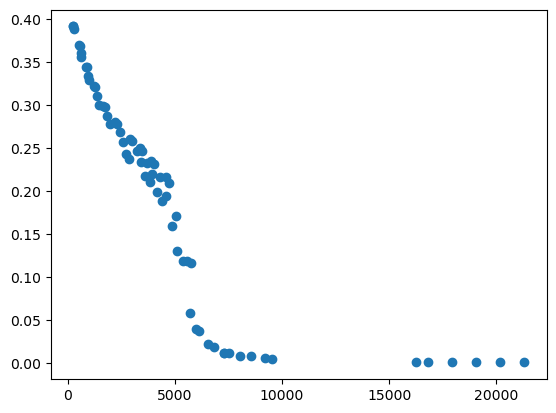

In [ ]:
plt.scatter(combined_df['A'], combined_df['Water Uptake [kg kg-1]'])
plt.show()

In [ ]:
combined_df_sorted = combined_df.sort_values('A')

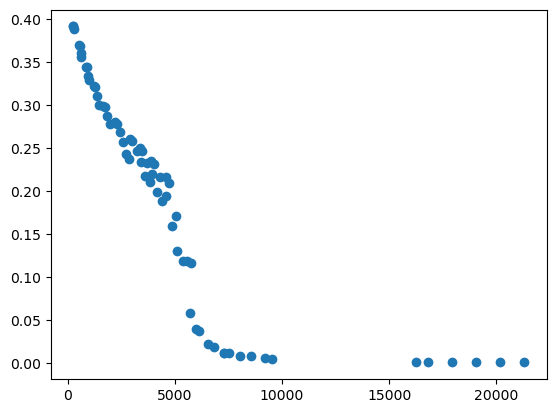

In [ ]:
plt.scatter(combined_df_sorted['A'], combined_df_sorted['Water Uptake [kg kg-1]'])
plt.show()

In [ ]:
n_of_A = interpolate.CubicSpline(combined_df_sorted['A'], combined_df_sorted['Water Uptake [kg kg-1]'])

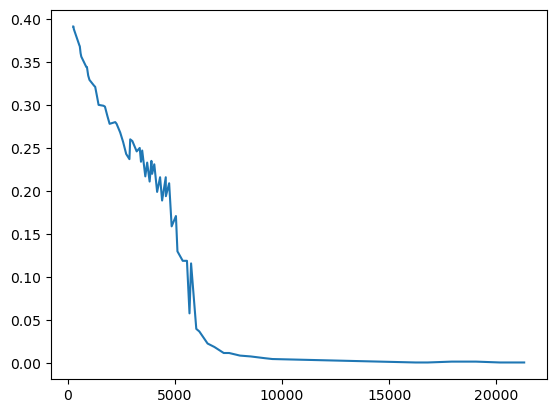

In [ ]:
#plt.scatter(combined_df_sorted['A'], combined_df['Water Uptake [kg kg-1]'])
plt.plot(combined_df_sorted['A'],n_of_A(combined_df_sorted['A']))
plt.show()

In [ ]:
def calculate_water(T,RH):
    A = -R * (T+273.15) * np.log(RH/100)
    Rate_H2O = n_of_A(A)
    
    return(Rate_H2O.item())

In [ ]:
calculate_water(25,80)

0.36760538777651225

In [13]:
#Source for weather data 
#https://weathersight.io/timeseries
#For Phoenix from 2020-2021
df_weather = pd.read_csv('data/Phoenix_weather_edited_final.csv')

In [ ]:
df_weather.head()

,Week,T_max_mean[C],T_min_mean[C],Max_dewp[C],Min_dewp[C]
0,1,19.8,4.6,-0.7,-3.6
1,2,20.0,4.7,-2.4,-5.7
2,3,23.2,8.6,3.9,-4.8
3,4,20.0,7.9,7.9,0.2
4,5,23.3,8.3,2.7,-3.8


In [ ]:
#Need a function that pulls the weekly data out of the dataframe 
def weekly_data(week):
    
    df_week = df_weather['Week'] == week
    T_high = df_weather[df_week]['T_max_mean[C]'].item()
    T_low = df_weather[df_week]['T_min_mean[C]'].item()
    Dewp_high = df_weather[df_week]['Max_dewp[C]'].item()
    Dewp_low = df_weather[df_week]['Min_dewp[C]'].item()
    
    return T_high, T_low, Dewp_high, Dewp_low                        

In [ ]:
#Find the saturated vapor pressure from temp and dewp 
#source for formula 
#https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf
def pressure_calculations(T,T_dew):
    
    P_0 = 6.11 * 10**((7.5*T)/(237.3+T))
    P = 6.11 * 10**((7.5*T_dew)/(237.3+T_dew))
    RH = P/P_0
    
    return RH 

In [ ]:
#Find mass of water depending on daily high and low, and mass MOF 
def water_daily(week,kg_MOF):
    
    T_high, T_low, Dewp_high, Dewp_low = weekly_data(week)
    
    RH_high = pressure_calculations(T_high, Dewp_high)
    
    RH_low = pressure_calculations(T_low, Dewp_low)
    
    #A_low = -R * (T_low+273.15) * np.log(RH_low/100)
    
    #A_high = -R * (T_high+273.15) * np.log(RH_high/100)
    
    high_water = calculate_water(T_high, RH_high)
    
    low_water = (calculate_water(T_low, RH_low))
    
    water_rate = low_water - high_water
    
    water_mass = water_rate * kg_MOF
    
    return water_mass

In [ ]:
#Some weeks (8,9,10) have negative outputs 
water_daily(11,1)

0.00044505904745355436